In [ ]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split


from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
images = np.load('/content/gdrive/My Drive/Colab Notebooks/images.npy')
Label = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Labels.csv')

In [ ]:
Label

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [ ]:
images.shape

(4750, 128, 128, 3)

In [ ]:
# The labels for images.
y = Label

In [ ]:
y.shape

(4750, 1)

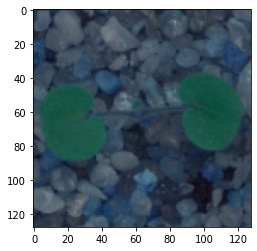

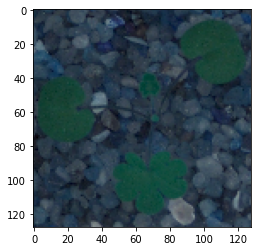

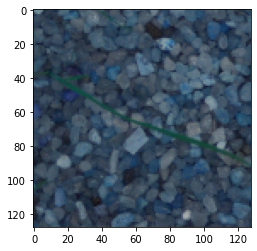

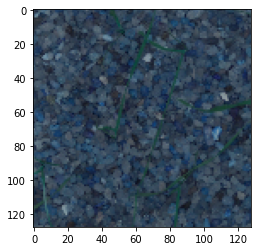

In [ ]:
plt.imshow(images[0], cmap='gray')
plt.show()

plt.imshow(images[1], cmap='gray')
plt.show()


plt.imshow(images[4748], cmap='gray')
plt.show()


plt.imshow(images[4749], cmap='gray')
plt.show()

In [ ]:
X = images

In [ ]:
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [ ]:
#To apply gaussian blurring:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 4750 numbers, each of which has 128 X 128 pixels. (It's the shape of the numpy array)



4750
(4750, 128, 128, 3)


In [ ]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 28, 28)) 

In [ ]:
new_x.shape

(4750, 28, 28)

In [ ]:
# We can see that each digit is made of 784 pixels.
X[0].shape 

(128, 128, 3)

In [ ]:
lst = ['a', 'b', 'c']
for idx, item in enumerate(lst):
  print(idx, item)

0 a
1 b
2 c


In [ ]:
new_x.shape

(4750, 28, 28)

In [ ]:
# Here we see that the length of new dataset after application of Gaussian Blurring filter is same as previous one.
# i.e. Total number of images is same.
len(new_x)

4750

In [ ]:
# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

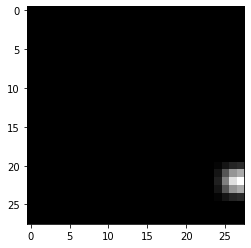

In [ ]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[1], cmap='gray')
#plt.title(y[i])

In [ ]:
# Now we create another empty numpy array of 10008 rows and 784 columns shape, to store the pixel values, which are obtained by applying the Gaussian Blur.
# The new array is necessary as we have to feed the data in the model in this original format.
another_x = np.empty((4750, 784))

In [ ]:
# Append/Set the values of the another array to be fed into model equal to the flattened array, which has the shape of 784 pixels (1-D)
for idx, img in enumerate(new_x):
  another_x[idx] = img.flatten()

In [ ]:
another_x.shape

(4750, 784)

In [ ]:
another_x

array([[8.65670657e+193, 7.57461825e+193, 4.32835328e+193, ...,
        5.12342565e+178, 4.70423464e+135, 2.35211732e+135],
       [2.10125382e+169, 1.83859709e+169, 1.05062691e+169, ...,
        1.74907288e+164, 3.06087754e+164, 3.49814576e+164],
       [3.04998360e+043, 4.22079845e+120, 1.68831938e+121, ...,
        8.56780677e+101, 1.49936619e+102, 1.71356135e+102],
       ...,
       [2.95570753e+280, 1.97047168e+280, 4.92617921e+279, ...,
        1.38880455e+300, 9.25869700e+299, 4.62934850e+299],
       [3.06584327e+110, 6.13168654e+110, 4.86239943e+207, ...,
        2.04131063e+130, 2.42865658e+130, 2.32317969e+130],
       [1.47373685e+134, 7.38269838e+289, 2.95307935e+290, ...,
        1.47935706e+135, 1.24212783e+130, 1.41957466e+130]])

In [ ]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [ ]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

In [ ]:
# Print the shape of dataset.
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (3325, 128, 128, 3)
3325 train samples
1425 test samples


In [ ]:
y_train.shape
y_test.shape

(1425, 1)

In [ ]:
# Normalize the data
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 1)
(1425, 128, 128, 3)
(1425, 1)


In [ ]:
#Print shape of data and number of images
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (3325, 128, 128, 3)
Images in X_train: 3325
Images in X_test: 1425
Max value in X_train: 1.0
Min value in X_train: 0.0


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test= ohe.fit_transform(y_test).toarray()


print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (3325, 12)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=32, epochs=12, validation_split = 0.3)

Epoch 1/12
73/73 [==============================] - 122s 2s/step - loss: 2.8481 - accuracy: 0.2527 - val_loss: 1.9766 - val_accuracy: 0.3106
Epoch 2/12
73/73 [==============================] - 122s 2s/step - loss: 1.6764 - accuracy: 0.4405 - val_loss: 1.6352 - val_accuracy: 0.4689
Epoch 3/12
73/73 [==============================] - 123s 2s/step - loss: 1.0930 - accuracy: 0.6639 - val_loss: 1.5448 - val_accuracy: 0.5200
Epoch 4/12
73/73 [==============================] - 122s 2s/step - loss: 0.5936 - accuracy: 0.8191 - val_loss: 1.7554 - val_accuracy: 0.4489
Epoch 5/12
73/73 [==============================] - 123s 2s/step - loss: 0.3097 - accuracy: 0.9128 - val_loss: 1.5405 - val_accuracy: 0.5862
Epoch 6/12
73/73 [==============================] - 123s 2s/step - loss: 0.1066 - accuracy: 0.9759 - val_loss: 1.7365 - val_accuracy: 0.5902
Epoch 7/12
73/73 [==============================] - 123s 2s/step - loss: 0.0990 - accuracy: 0.9764 - val_loss: 1.7935 - val_accuracy: 0.5862
Epoch 8/12
73

In [ ]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 15s 337ms/step - loss: 2.4914 - accuracy: 0.5909


[2.4913930892944336, 0.5908771753311157]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
104/104 [==============================] - 143s 1s/step - loss: 2.3034 - accuracy: 0.2641 - val_loss: 1.6165 - val_accuracy: 0.4716
Epoch 2/10
104/104 [==============================] - 143s 1s/step - loss: 1.3046 - accuracy: 0.5597 - val_loss: 1.2270 - val_accuracy: 0.5621
Epoch 3/10
104/104 [==============================] - 143s 1s/step - loss: 0.8515 - accuracy: 0.7239 - val_loss: 1.1431 - val_accuracy: 0.6035
Epoch 4/10
104/104 [==============================] - 143s 1s/step - loss: 0.4731 - accuracy: 0.8508 - val_loss: 1.1785 - val_accuracy: 0.6232
Epoch 5/10
104/104 [==============================] - 143s 1s/step - loss: 0.2466 - accuracy: 0.9293 - val_loss: 1.3007 - val_accuracy: 0.6295
Epoch 6/10
104/104 [==============================] - 143s 1s/step - loss: 0.1335 - accuracy: 0.9663 - val_loss: 1.5336 - val_accuracy: 0.6063


In [ ]:
## Final loss and accuracy
model.evaluate(X_test, y_test)


45/45 [==============================] - 13s 287ms/step - loss: 1.5336 - accuracy: 0.6063


[1.5336118936538696, 0.6063157916069031]